# Pricipal component analysis

In this exercise, we are performing dimensionality reduction using principal component analysis (PCA) for circadian gene expression data set from the study “Circadian Enhancers Coordinate Multiple Phases of Rhythmic Gene Transcription In Vivo” by Fang et al (https://doi.org/10.1016/j.cell.2014.10.022). 

## Dataset

The data is available in NCBI GEO database (https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE59486, accession id GSE59486).

## Importing the modules

The first step is to import the required Python libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # import matplotlib library
%matplotlib inline

## Importing the data

In [2]:
df= pd.read_csv('/home/nbuser/library/expression_oscillating_genes.csv')
df.head()

,Gene Name,ZT1,ZT4,ZT7,ZT10,ZT13,ZT16,ZT19,ZT22
0,Gm4952,23.327000,16.005000,6.308000,9.402000,11.382000,12.141000,14.680000,16.70600
1,Kcnk6,5.940663,5.144852,3.367074,2.942408,3.613729,4.310646,4.408377,5.79872
2,Smagp,13.465000,7.944000,3.853000,4.040000,5.853000,9.329000,11.669000,13.19800
3,Slc22a15,11.113000,9.235000,7.645000,4.112000,4.847000,5.703000,9.009000,10.82100
4,Leo1,7.809000,6.144000,2.475000,3.444000,4.632000,6.544000,7.604000,7.57400


In [3]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260
Gene Name,Gm4952,Kcnk6,Smagp,Slc22a15,Leo1,Magi1,Magi1,Tfe3,Shank2,Sema4c,...,Tymp,Cbs,Gckr,Hist1h2ad,Cbs,Tbc1d22b,Ablim3,Bach2os,1110020A21Rik,F730035M05Rik
ZT1,23.327,5.94066,13.465,11.113,7.809,17.62,17.871,17.02,13.065,7.1137,...,68.7963,83.796,61.821,43.3079,83.446,4.906,37.043,5.91706,10.462,10.4162
ZT4,16.005,5.14485,7.944,9.235,6.144,13.383,13.344,16.553,7.357,5.91473,...,50.2543,68.833,67.464,25.8779,68.52,4.539,36.236,4.15506,8.648,8.50405
ZT7,6.308,3.36707,3.853,7.645,2.475,11.219,11.278,16.349,3.773,5.49354,...,26.0219,46.811,54.616,34.5293,46.691,2.755,11.039,3.21947,6.907,9.0474
ZT10,9.402,2.94241,4.04,4.112,3.444,9.605,9.533,15.651,3.168,5.23773,...,21.7477,27.232,38.189,17.7608,27.189,3.139,19.443,3.28959,5.653,5.17457


In [4]:
# remove the row of gne names
df = df.T
df = df.drop(['Gene Name'])


df.head()

,0,1,2,3,4,5,6,7,8,9,...,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260
ZT1,23.327,5.94066,13.465,11.113,7.809,17.62,17.871,17.02,13.065,7.1137,...,68.7963,83.796,61.821,43.3079,83.446,4.906,37.043,5.91706,10.462,10.4162
ZT4,16.005,5.14485,7.944,9.235,6.144,13.383,13.344,16.553,7.357,5.91473,...,50.2543,68.833,67.464,25.8779,68.52,4.539,36.236,4.15506,8.648,8.50405
ZT7,6.308,3.36707,3.853,7.645,2.475,11.219,11.278,16.349,3.773,5.49354,...,26.0219,46.811,54.616,34.5293,46.691,2.755,11.039,3.21947,6.907,9.0474
ZT10,9.402,2.94241,4.04,4.112,3.444,9.605,9.533,15.651,3.168,5.23773,...,21.7477,27.232,38.189,17.7608,27.189,3.139,19.443,3.28959,5.653,5.17457
ZT13,11.382,3.61373,5.853,4.847,4.632,7.792,7.882,16.302,2.37,3.85013,...,27.7953,38.743,51.939,28.3206,38.582,3.537,22.873,3.48893,7.289,3.81965


## PCA

[]

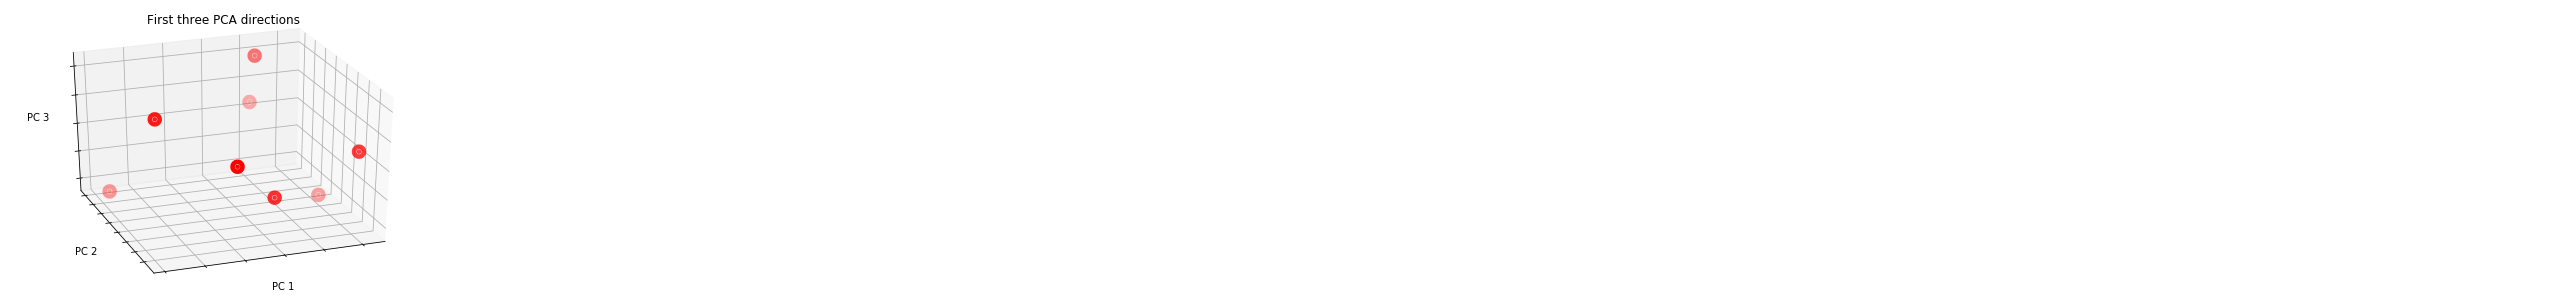

In [5]:
# the actual PCA analysis 

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
df_pca  = sklearn_pca.fit_transform(df)


# plot the first 3 principal components

from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c='r',cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("PC 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC 3")
ax.w_zaxis.set_ticklabels([])

In [8]:
# pricinpal component analysis with only 2 principal components

pca2 = sklearnPCA(n_components=2) 
df_pca2 = pca2.fit_transform(df) 

Text(0.5, 1.0, 'This The 2D Transformation of above graph ')

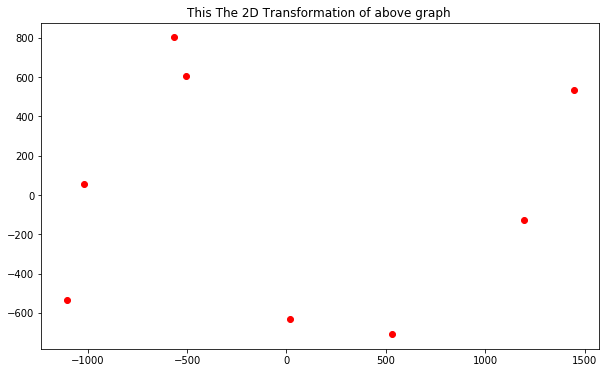

In [9]:
# plot the first 2 principal components

fig = plt.figure(1, figsize=(10,6))
plt.scatter(df_pca2[:, 0],  df_pca2[:, 1],c='r')

#plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r')
plt.title("This The 2D Transformation of above graph ")